In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Resources/tsunami.csv")

### Filter for Last 100 Years
---

In [3]:
previous_100 = df[df['Year'] >= 1921]

In [4]:
previous_100.head()

,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,...,Tsunami Magnitude (Iida),Tsunami Intensity,Total Deaths,Total Missing,Total Missing Description,Total Injuries,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Damaged
1002,1921.0,5.0,14.0,11.0,17.0,45.0,2.0,1.0,6.2,0.0,...,NaN,0.5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
1003,1921.0,8.0,4.0,NaN,NaN,NaN,3.0,1.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
1004,1921.0,9.0,11.0,4.0,1.0,38.0,4.0,1.0,7.5,0.0,...,-2.3,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1005,1921.0,11.0,11.0,18.0,36.0,8.0,3.0,1.0,7.5,0.0,...,0.5,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1006,1921.0,12.0,16.0,NaN,NaN,NaN,-1.0,9.0,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping Columns 😽😽😽

In [5]:
columns_drop = ['Mo', 'Dy', 'Hr', 'Mn', 'Sec', 'Tsunami Magnitude (Iida)', 'Total Injuries']

previous_100.drop(columns_drop, axis =1 , inplace = True)

In [6]:
previous_100.isnull().sum().sort_values(ascending = False)

Total Missing                1151
Total Missing Description    1150
Total Houses Damaged         1091
Total Damage ($Mil)          1026
Total Houses Destroyed       1019
Total Deaths                  819
Tsunami Intensity             745
Total Damage Description      608
Maximum Water Height (m)      318
Earthquake Magnitude          260
Longitude                      64
Latitude                       64
Tsunami Event Validity          0
Number of Runups                0
Location Name                   0
Country                         0
Deposits                        0
Tsunami Cause Code              0
Year                            0
dtype: int64

In [7]:
too_many_nulls = ['Total Missing', 'Total Missing Description', 'Total Houses Damaged',
                 'Total Damage ($Mil)', 'Total Houses Destroyed', 'Total Damage Description']

previous_100.drop(too_many_nulls, axis = 1, inplace = True)

***Drop all columns that have many non-nulls***

* Total Missing
* Total Missing Description
* Total Houses Damaged
* Total Damaged ($Mil)
* Total Damage Description - Can't analyze String, unless someone is a NPL (natural language processising) expert

### Must have coordinates 

In [8]:
previous_100 = previous_100[previous_100['Latitude'].notnull()]
previous_100

,Year,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,Country,Location Name,Latitude,Longitude,Maximum Water Height (m),Number of Runups,Tsunami Intensity,Total Deaths
1002,1921.0,2.0,1.0,6.2,0.0,INDONESIA,MAKASSAR STRAIT,0.700,117.900,1.00,1.0,0.5,NaN
1003,1921.0,3.0,1.0,NaN,0.0,CHINA,"XIAOSI, DANDONG, LIAONING",40.130,124.380,NaN,0.0,NaN,NaN
1004,1921.0,4.0,1.0,7.5,0.0,INDONESIA,JAVA,-11.000,111.000,0.10,3.0,-2.0,NaN
1005,1921.0,3.0,1.0,7.5,0.0,PHILIPPINES,PHILIPPINE TRENCH,8.000,127.000,NaN,4.0,1.0,NaN
1007,1922.0,2.0,1.0,7.2,0.0,PERU,S. PERU,-16.500,-73.000,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157,2021.0,4.0,1.0,7.1,0.0,PHILIPPINES,"MINDANAO ISLAND, PHILIPPINES",6.455,126.742,0.05,2.0,NaN,1.0
2158,2021.0,4.0,1.0,8.1,0.0,UK TERRITORY,SOUTHERN ATLANTIC OCEAN,-58.416,-25.321,0.64,44.0,NaN,NaN
2159,2021.0,4.0,1.0,7.2,0.0,HAITI,PORT-AU-PRINCE,18.408,-73.475,NaN,3.0,NaN,2248.0
2160,2021.0,4.0,1.0,7.0,0.0,MEXICO,S. MEXICO,16.982,-99.773,0.48,1.0,NaN,3.0


### Replace Nulls with Column Mean 
---

If nulls is not significant, can replace with mean of non-nulls.

In [9]:
previous_100.isnull().sum().sort_values()

Year                          0
Tsunami Event Validity        0
Tsunami Cause Code            0
Deposits                      0
Country                       0
Location Name                 0
Latitude                      0
Longitude                     0
Number of Runups              0
Earthquake Magnitude        198
Maximum Water Height (m)    286
Tsunami Intensity           690
Total Deaths                763
dtype: int64

In [10]:
# Fill Low Na Columns with Mean 
previous_100 = previous_100[previous_100['Earthquake Magnitude'].notnull()]
# previous_100['Earthquake Magnitude'] = previous_100['Earthquake Magnitude'].fillna(previous_100['Earthquake Magnitude'].mean())
#previous_100['Maximum Water Height (m)'] = previous_100['Maximum Water Height (m)'].fillna(previous_100['Maximum Water Height (m)'].mean())
previous_100 = previous_100[previous_100['Maximum Water Height (m)'].notnull()]

## Key Columns 🔑🔑🔑

1) Water Height  
2) Tsunami Intensity vs. Magnitude (Intensity v. Magnitude Ratio)  
3) Total Deaths  
4) Earthquake Magnitude


Since the key columns we want also have the most nulls, we are likely forced to delete rows with nulls.

In [11]:
intensity = previous_100[previous_100['Tsunami Intensity'].notnull()]

In [12]:
intensity.isnull().sum()

Year                          0
Tsunami Event Validity        0
Tsunami Cause Code            0
Earthquake Magnitude          0
Deposits                      0
Country                       0
Location Name                 0
Latitude                      0
Longitude                     0
Maximum Water Height (m)      0
Number of Runups              0
Tsunami Intensity             0
Total Deaths                168
dtype: int64

In [13]:
# Fill magnitude with mean, close enough 
#intensity = intensity[intensity['Tsunami Magnitude (Iida)'].notnull()]

In [14]:
intensity.isnull().sum()

Year                          0
Tsunami Event Validity        0
Tsunami Cause Code            0
Earthquake Magnitude          0
Deposits                      0
Country                       0
Location Name                 0
Latitude                      0
Longitude                     0
Maximum Water Height (m)      0
Number of Runups              0
Tsunami Intensity             0
Total Deaths                168
dtype: int64

### Mapping of Cause Code

In [15]:
dict_ = {"Tsunami Cause Code": [x for x in range(0,12)],
        "Natural Disaster": ['Unknown', 'Earthquake', 'Questionable Earthquake', 'Earthquake and Landslide',
                            'Volcano and Earthquake', 'Volcano, Earthquake, and Landslaide', 'Volcano',
                            'Volcano and Landslide', 'Landslide', 'Meterological', 'Explosion', 'Astronomical Tide']}

code = pd.DataFrame(dict_)

intensity = pd.merge(intensity, code, on = 'Tsunami Cause Code')

intensity.head()

,Year,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,Country,Location Name,Latitude,Longitude,Maximum Water Height (m),Number of Runups,Tsunami Intensity,Total Deaths,Natural Disaster
0,1921.0,2.0,1.0,6.2,0.0,INDONESIA,MAKASSAR STRAIT,0.700,117.900,1.0,1.0,0.5,NaN,Earthquake
1,1921.0,4.0,1.0,7.5,0.0,INDONESIA,JAVA,-11.000,111.000,0.1,3.0,-2.0,NaN,Earthquake
2,1922.0,2.0,1.0,6.3,0.0,PHILIPPINES,CEBU ISLAND,10.200,124.100,0.7,3.0,0.0,5.0,Earthquake
3,1922.0,4.0,1.0,8.7,0.0,CHILE,NORTHERN CHILE,-28.553,-70.755,9.0,36.0,2.5,700.0,Earthquake
4,1922.0,3.0,1.0,6.3,0.0,NEW ZEALAND,SE. NEW ZEALAND,-43.000,173.000,0.4,3.0,0.0,NaN,Earthquake


In [42]:
intensity.to_csv("./Cleaned_Data_intensity.csv", index = False)

In [17]:
deaths_df = intensity[intensity['Total Deaths'].notnull()]
deaths_df.to_csv("./Cleaned_Data_deaths.csv", index = False)
deaths_df

,Year,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,Country,Location Name,Latitude,Longitude,Maximum Water Height (m),Number of Runups,Tsunami Intensity,Total Deaths,Natural Disaster
2,1922.0,2.0,1.0,6.3,0.0,PHILIPPINES,CEBU ISLAND,10.200,124.100,0.7,3.0,0.0,5.0,Earthquake
3,1922.0,4.0,1.0,8.7,0.0,CHILE,NORTHERN CHILE,-28.553,-70.755,9.0,36.0,2.5,700.0,Earthquake
5,1923.0,4.0,1.0,7.2,1.0,RUSSIA,KAMCHATKA,56.500,162.500,20.0,11.0,3.5,18.0,Earthquake
7,1923.0,4.0,1.0,7.9,1.0,JAPAN,SAGAMI BAY,35.100,139.500,13.0,140.0,3.0,142807.0,Earthquake
12,1927.0,4.0,1.0,6.8,0.0,UKRAINE,"CRIMEA, BLACK SEA",44.400,34.500,1.0,1.0,2.0,11.0,Earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1992.0,4.0,3.0,7.8,9.0,INDONESIA,FLORES SEA,-8.480,121.896,26.2,111.0,2.7,2500.0,Earthquake and Landslide
280,1995.0,4.0,3.0,6.9,0.0,INDONESIA,TIMOR SEA,-8.452,125.049,4.0,2.0,1.5,11.0,Earthquake and Landslide
281,1995.0,4.0,3.0,6.5,1.0,GREECE,GULF OF CORINTH: AIYION,38.401,22.283,1.0,2.0,3.0,26.0,Earthquake and Landslide
283,1933.0,4.0,6.0,6.0,1.0,RUSSIA,"KHARIMKOTAN, N. KURIL ISLANDS",49.120,154.508,9.0,2.0,2.0,2.0,Volcano


## Distribution of Year
---

Looks like despite focusing on Intensity the year is more or less well distributed.. good nuff

(array([23., 20., 28., 26., 31., 46., 43., 13., 19., 36.]),
 array([1921. , 1929.2, 1937.4, 1945.6, 1953.8, 1962. , 1970.2, 1978.4,
        1986.6, 1994.8, 2003. ]),
 <BarContainer object of 10 artists>)

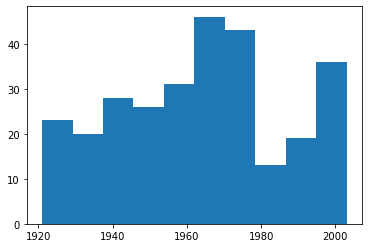

In [18]:
import matplotlib.pyplot as plt

plt.hist(intensity['Year'])

## API Test

In [106]:
import requests 
import json

In [107]:
check = requests.get('http://127.0.0.1:5000/api/v1.0/Tsunami')

In [114]:
check

<Response [500]>

In [111]:
data = check.json()

JSONDecodeError: [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
  "http://www.w3.org/TR/html4/loose.dtd">
<html>
  <head>
    <title>TypeError: Object of type ObjectId is not JSON serializable // Werkzeug Debugger</title>
    <link rel="stylesheet" href="?__debugger__=yes&amp;cmd=resource&amp;f=style.css"
        type="text/css">
    <!-- We need to make sure this has a favicon so that the debugger does
         not accidentally trigger a request to /favicon.ico which might
         change the application's state. -->
    <link rel="shortcut icon"
        href="?__debugger__=yes&amp;cmd=resource&amp;f=console.png">
    <script src="?__debugger__=yes&amp;cmd=resource&amp;f=debugger.js"></script>
    <script type="text/javascript">
      var TRACEBACK = 140156280547408,
          CONSOLE_MODE = false,
          EVALEX = true,
          EVALEX_TRUSTED = false,
          SECRET = "iYso7LLPBlN45cG39LNz";
    </script>
  </head>
  <body style="background-color: #fff">
    <div class="debugger">
<h1>TypeError</h1>
<div class="detail">
  <p class="errormsg">TypeError: Object of type ObjectId is not JSON serializable</p>
</div>
<h2 class="traceback">Traceback <em>(most recent call last)</em></h2>
<div class="traceback">
  <h3></h3>
  <ul><li><div class="frame" id="frame-140156281197280">
  <h4>File <cite class="filename">"/opt/anaconda3/lib/python3.9/site-packages/flask/app.py"</cite>,
      line <em class="line">2464</em>,
      in <code class="function">__call__</code></h4>
  <div class="source library"><pre class="line before"><span class="ws"></span> </pre>
<pre class="line before"><span class="ws">    </span>def __call__(self, environ, start_response):</pre>
<pre class="line before"><span class="ws">        </span>&quot;&quot;&quot;The WSGI server calls the Flask application object as the</pre>
<pre class="line before"><span class="ws">        </span>WSGI application. This calls :meth:`wsgi_app` which can be</pre>
<pre class="line before"><span class="ws">        </span>wrapped to applying middleware.&quot;&quot;&quot;</pre>
<pre class="line current"><span class="ws">        </span>return self.wsgi_app(environ, start_response)</pre>
<pre class="line after"><span class="ws"></span> </pre>
<pre class="line after"><span class="ws">    </span>def __repr__(self):</pre>
<pre class="line after"><span class="ws">        </span>return &quot;&lt;%s %r&gt;&quot; % (self.__class__.__name__, self.name)</pre></div>
</div>

<li><div class="frame" id="frame-140156281197328">
  <h4>File <cite class="filename">"/opt/anaconda3/lib/python3.9/site-packages/flask/app.py"</cite>,
      line <em class="line">2450</em>,
      in <code class="function">wsgi_app</code></h4>
  <div class="source library"><pre class="line before"><span class="ws">            </span>try:</pre>
<pre class="line before"><span class="ws">                </span>ctx.push()</pre>
<pre class="line before"><span class="ws">                </span>response = self.full_dispatch_request()</pre>
<pre class="line before"><span class="ws">            </span>except Exception as e:</pre>
<pre class="line before"><span class="ws">                </span>error = e</pre>
<pre class="line current"><span class="ws">                </span>response = self.handle_exception(e)</pre>
<pre class="line after"><span class="ws">            </span>except:  # noqa: B001</pre>
<pre class="line after"><span class="ws">                </span>error = sys.exc_info()[1]</pre>
<pre class="line after"><span class="ws">                </span>raise</pre>
<pre class="line after"><span class="ws">            </span>return response(environ, start_response)</pre>
<pre class="line after"><span class="ws">        </span>finally:</pre></div>
</div>

<li><div class="frame" id="frame-140156281197376">
  <h4>File <cite class="filename">"/opt/anaconda3/lib/python3.9/site-packages/flask/app.py"</cite>,
      line <em class="line">1867</em>,
      in <code class="function">handle_exception</code></h4>
  <div class="source library"><pre class="line before"><span class="ws">            </span># if we want to repropagate the exception, we can attempt to</pre>
<pre class="line before"><span class="ws">            </span># raise it with the whole traceback in case we can do that</pre>
<pre class="line before"><span class="ws">            </span># (the function was actually called from the except part)</pre>
<pre class="line before"><span class="ws">            </span># otherwise, we just raise the error again</pre>
<pre class="line before"><span class="ws">            </span>if exc_value is e:</pre>
<pre class="line current"><span class="ws">                </span>reraise(exc_type, exc_value, tb)</pre>
<pre class="line after"><span class="ws">            </span>else:</pre>
<pre class="line after"><span class="ws">                </span>raise e</pre>
<pre class="line after"><span class="ws"></span> </pre>
<pre class="line after"><span class="ws">        </span>self.log_exception((exc_type, exc_value, tb))</pre>
<pre class="line after"><span class="ws">        </span>server_error = InternalServerError()</pre></div>
</div>

<li><div class="frame" id="frame-140156281197424">
  <h4>File <cite class="filename">"/opt/anaconda3/lib/python3.9/site-packages/flask/_compat.py"</cite>,
      line <em class="line">39</em>,
      in <code class="function">reraise</code></h4>
  <div class="source library"><pre class="line before"><span class="ws">    </span>import collections.abc as collections_abc</pre>
<pre class="line before"><span class="ws"></span> </pre>
<pre class="line before"><span class="ws">    </span>def reraise(tp, value, tb=None):</pre>
<pre class="line before"><span class="ws">        </span>if value.__traceback__ is not tb:</pre>
<pre class="line before"><span class="ws">            </span>raise value.with_traceback(tb)</pre>
<pre class="line current"><span class="ws">        </span>raise value</pre>
<pre class="line after"><span class="ws"></span> </pre>
<pre class="line after"><span class="ws">    </span>implements_to_string = _identity</pre>
<pre class="line after"><span class="ws"></span> </pre>
<pre class="line after"><span class="ws"></span>else:</pre>
<pre class="line after"><span class="ws">    </span>iterkeys = lambda d: d.iterkeys()</pre></div>
</div>

<li><div class="frame" id="frame-140156281197616">
  <h4>File <cite class="filename">"/opt/anaconda3/lib/python3.9/site-packages/flask/app.py"</cite>,
      line <em class="line">2447</em>,
      in <code class="function">wsgi_app</code></h4>
  <div class="source library"><pre class="line before"><span class="ws">        </span>ctx = self.request_context(environ)</pre>
<pre class="line before"><span class="ws">        </span>error = None</pre>
<pre class="line before"><span class="ws">        </span>try:</pre>
<pre class="line before"><span class="ws">            </span>try:</pre>
<pre class="line before"><span class="ws">                </span>ctx.push()</pre>
<pre class="line current"><span class="ws">                </span>response = self.full_dispatch_request()</pre>
<pre class="line after"><span class="ws">            </span>except Exception as e:</pre>
<pre class="line after"><span class="ws">                </span>error = e</pre>
<pre class="line after"><span class="ws">                </span>response = self.handle_exception(e)</pre>
<pre class="line after"><span class="ws">            </span>except:  # noqa: B001</pre>
<pre class="line after"><span class="ws">                </span>error = sys.exc_info()[1]</pre></div>
</div>

<li><div class="frame" id="frame-140156281197664">
  <h4>File <cite class="filename">"/opt/anaconda3/lib/python3.9/site-packages/flask/app.py"</cite>,
      line <em class="line">1952</em>,
      in <code class="function">full_dispatch_request</code></h4>
  <div class="source library"><pre class="line before"><span class="ws">            </span>request_started.send(self)</pre>
<pre class="line before"><span class="ws">            </span>rv = self.preprocess_request()</pre>
<pre class="line before"><span class="ws">            </span>if rv is None:</pre>
<pre class="line before"><span class="ws">                </span>rv = self.dispatch_request()</pre>
<pre class="line before"><span class="ws">        </span>except Exception as e:</pre>
<pre class="line current"><span class="ws">            </span>rv = self.handle_user_exception(e)</pre>
<pre class="line after"><span class="ws">        </span>return self.finalize_request(rv)</pre>
<pre class="line after"><span class="ws"></span> </pre>
<pre class="line after"><span class="ws">    </span>def finalize_request(self, rv, from_error_handler=False):</pre>
<pre class="line after"><span class="ws">        </span>&quot;&quot;&quot;Given the return value from a view function this finalizes</pre>
<pre class="line after"><span class="ws">        </span>the request by converting it into a response and invoking the</pre></div>
</div>

<li><div class="frame" id="frame-140156281197712">
  <h4>File <cite class="filename">"/opt/anaconda3/lib/python3.9/site-packages/flask/app.py"</cite>,
      line <em class="line">1821</em>,
      in <code class="function">handle_user_exception</code></h4>
  <div class="source library"><pre class="line before"><span class="ws">            </span>return self.handle_http_exception(e)</pre>
<pre class="line before"><span class="ws"></span> </pre>
<pre class="line before"><span class="ws">        </span>handler = self._find_error_handler(e)</pre>
<pre class="line before"><span class="ws"></span> </pre>
<pre class="line before"><span class="ws">        </span>if handler is None:</pre>
<pre class="line current"><span class="ws">            </span>reraise(exc_type, exc_value, tb)</pre>
<pre class="line after"><span class="ws">        </span>return handler(e)</pre>
<pre class="line after"><span class="ws"></span> </pre>
<pre class="line after"><span class="ws">    </span>def handle_exception(self, e):</pre>
<pre class="line after"><span class="ws">        </span>&quot;&quot;&quot;Handle an exception that did not have an error handler</pre>
<pre class="line after"><span class="ws">        </span>associated with it, or that was raised from an error handler.</pre></div>
</div>

<li><div class="frame" id="frame-140156281197760">
  <h4>File <cite class="filename">"/opt/anaconda3/lib/python3.9/site-packages/flask/_compat.py"</cite>,
      line <em class="line">39</em>,
      in <code class="function">reraise</code></h4>
  <div class="source library"><pre class="line before"><span class="ws">    </span>import collections.abc as collections_abc</pre>
<pre class="line before"><span class="ws"></span> </pre>
<pre class="line before"><span class="ws">    </span>def reraise(tp, value, tb=None):</pre>
<pre class="line before"><span class="ws">        </span>if value.__traceback__ is not tb:</pre>
<pre class="line before"><span class="ws">            </span>raise value.with_traceback(tb)</pre>
<pre class="line current"><span class="ws">        </span>raise value</pre>
<pre class="line after"><span class="ws"></span> </pre>
<pre class="line after"><span class="ws">    </span>implements_to_string = _identity</pre>
<pre class="line after"><span class="ws"></span> </pre>
<pre class="line after"><span class="ws"></span>else:</pre>
<pre class="line after"><span class="ws">    </span>iterkeys = lambda d: d.iterkeys()</pre></div>
</div>

<li><div class="frame" id="frame-140156281197808">
  <h4>File <cite class="filename">"/opt/anaconda3/lib/python3.9/site-packages/flask/app.py"</cite>,
      line <em class="line">1950</em>,
      in <code class="function">full_dispatch_request</code></h4>
  <div class="source library"><pre class="line before"><span class="ws">        </span>self.try_trigger_before_first_request_functions()</pre>
<pre class="line before"><span class="ws">        </span>try:</pre>
<pre class="line before"><span class="ws">            </span>request_started.send(self)</pre>
<pre class="line before"><span class="ws">            </span>rv = self.preprocess_request()</pre>
<pre class="line before"><span class="ws">            </span>if rv is None:</pre>
<pre class="line current"><span class="ws">                </span>rv = self.dispatch_request()</pre>
<pre class="line after"><span class="ws">        </span>except Exception as e:</pre>
<pre class="line after"><span class="ws">            </span>rv = self.handle_user_exception(e)</pre>
<pre class="line after"><span class="ws">        </span>return self.finalize_request(rv)</pre>
<pre class="line after"><span class="ws"></span> </pre>
<pre class="line after"><span class="ws">    </span>def finalize_request(self, rv, from_error_handler=False):</pre></div>
</div>

<li><div class="frame" id="frame-140156281197856">
  <h4>File <cite class="filename">"/opt/anaconda3/lib/python3.9/site-packages/flask/app.py"</cite>,
      line <em class="line">1936</em>,
      in <code class="function">dispatch_request</code></h4>
  <div class="source library"><pre class="line before"><span class="ws">            </span>getattr(rule, &quot;provide_automatic_options&quot;, False)</pre>
<pre class="line before"><span class="ws">            </span>and req.method == &quot;OPTIONS&quot;</pre>
<pre class="line before"><span class="ws">        </span>):</pre>
<pre class="line before"><span class="ws">            </span>return self.make_default_options_response()</pre>
<pre class="line before"><span class="ws">        </span># otherwise dispatch to the handler for that endpoint</pre>
<pre class="line current"><span class="ws">        </span>return self.view_functions[rule.endpoint](**req.view_args)</pre>
<pre class="line after"><span class="ws"></span> </pre>
<pre class="line after"><span class="ws">    </span>def full_dispatch_request(self):</pre>
<pre class="line after"><span class="ws">        </span>&quot;&quot;&quot;Dispatches the request and on top of that performs request</pre>
<pre class="line after"><span class="ws">        </span>pre and postprocessing as well as HTTP exception catching and</pre>
<pre class="line after"><span class="ws">        </span>error handling.</pre></div>
</div>

<li><div class="frame" id="frame-140156281197904">
  <h4>File <cite class="filename">"/Users/kevindai/Tsunami-Project-3-team5/app.py"</cite>,
      line <em class="line">55</em>,
      in <code class="function">intensity</code></h4>
  <div class="source "><pre class="line before"><span class="ws"></span>@app.route(&quot;/api/v1.0/Tsunami&quot;)</pre>
<pre class="line before"><span class="ws"></span>def intensity():</pre>
<pre class="line before"><span class="ws">    </span># Query Intensity Dataset</pre>
<pre class="line before"><span class="ws">    </span>query = {&quot;Year&quot;: {&#x27;$gte&#x27;: 1921}}</pre>
<pre class="line before"><span class="ws">    </span>dataset_intensity = list(db.Tsunami.find(query))</pre>
<pre class="line current"><span class="ws">    </span>return jsonify(dataset_intensity)</pre>
<pre class="line after"><span class="ws"></span> </pre>
<pre class="line after"><span class="ws"></span># Debug ON</pre>
<pre class="line after"><span class="ws"></span>if __name__ == &#x27;__main__&#x27;:</pre>
<pre class="line after"><span class="ws">    </span>app.run(debug=True)</pre></div>
</div>

<li><div class="frame" id="frame-140156281197520">
  <h4>File <cite class="filename">"/opt/anaconda3/lib/python3.9/site-packages/flask/json/__init__.py"</cite>,
      line <em class="line">370</em>,
      in <code class="function">jsonify</code></h4>
  <div class="source library"><pre class="line before"><span class="ws">        </span>data = args[0]</pre>
<pre class="line before"><span class="ws">    </span>else:</pre>
<pre class="line before"><span class="ws">        </span>data = args or kwargs</pre>
<pre class="line before"><span class="ws"></span> </pre>
<pre class="line before"><span class="ws">    </span>return current_app.response_class(</pre>
<pre class="line current"><span class="ws">        </span>dumps(data, indent=indent, separators=separators) + &quot;\n&quot;,</pre>
<pre class="line after"><span class="ws">        </span>mimetype=current_app.config[&quot;JSONIFY_MIMETYPE&quot;],</pre>
<pre class="line after"><span class="ws">    </span>)</pre>
<pre class="line after"><span class="ws"></span> </pre>
<pre class="line after"><span class="ws"></span> </pre>
<pre class="line after"><span class="ws"></span>def tojson_filter(obj, **kwargs):</pre></div>
</div>

<li><div class="frame" id="frame-140156281197568">
  <h4>File <cite class="filename">"/opt/anaconda3/lib/python3.9/site-packages/flask/json/__init__.py"</cite>,
      line <em class="line">211</em>,
      in <code class="function">dumps</code></h4>
  <div class="source library"><pre class="line before"><span class="ws">        </span>``app`` can be passed directly, rather than requiring an app</pre>
<pre class="line before"><span class="ws">        </span>context for configuration.</pre>
<pre class="line before"><span class="ws">    </span>&quot;&quot;&quot;</pre>
<pre class="line before"><span class="ws">    </span>_dump_arg_defaults(kwargs, app=app)</pre>
<pre class="line before"><span class="ws">    </span>encoding = kwargs.pop(&quot;encoding&quot;, None)</pre>
<pre class="line current"><span class="ws">    </span>rv = _json.dumps(obj, **kwargs)</pre>
<pre class="line after"><span class="ws">    </span>if encoding is not None and isinstance(rv, text_type):</pre>
<pre class="line after"><span class="ws">        </span>rv = rv.encode(encoding)</pre>
<pre class="line after"><span class="ws">    </span>return rv</pre>
<pre class="line after"><span class="ws"></span> </pre>
<pre class="line after"><span class="ws"></span> </pre></div>
</div>

<li><div class="frame" id="frame-140156281197952">
  <h4>File <cite class="filename">"/opt/anaconda3/lib/python3.9/json/__init__.py"</cite>,
      line <em class="line">234</em>,
      in <code class="function">dumps</code></h4>
  <div class="source library"><pre class="line before"><span class="ws">        </span>cls is None and indent is None and separators is None and</pre>
<pre class="line before"><span class="ws">        </span>default is None and not sort_keys and not kw):</pre>
<pre class="line before"><span class="ws">        </span>return _default_encoder.encode(obj)</pre>
<pre class="line before"><span class="ws">    </span>if cls is None:</pre>
<pre class="line before"><span class="ws">        </span>cls = JSONEncoder</pre>
<pre class="line current"><span class="ws">    </span>return cls(</pre>
<pre class="line after"><span class="ws">        </span>skipkeys=skipkeys, ensure_ascii=ensure_ascii,</pre>
<pre class="line after"><span class="ws">        </span>check_circular=check_circular, allow_nan=allow_nan, indent=indent,</pre>
<pre class="line after"><span class="ws">        </span>separators=separators, default=default, sort_keys=sort_keys,</pre>
<pre class="line after"><span class="ws">        </span>**kw).encode(obj)</pre>
<pre class="line after"><span class="ws"></span> </pre></div>
</div>

<li><div class="frame" id="frame-140156281198096">
  <h4>File <cite class="filename">"/opt/anaconda3/lib/python3.9/json/encoder.py"</cite>,
      line <em class="line">201</em>,
      in <code class="function">encode</code></h4>
  <div class="source library"><pre class="line before"><span class="ws">        </span># This doesn&#x27;t pass the iterator directly to &#x27;&#x27;.join() because the</pre>
<pre class="line before"><span class="ws">        </span># exceptions aren&#x27;t as detailed.  The list call should be roughly</pre>
<pre class="line before"><span class="ws">        </span># equivalent to the PySequence_Fast that &#x27;&#x27;.join() would do.</pre>
<pre class="line before"><span class="ws">        </span>chunks = self.iterencode(o, _one_shot=True)</pre>
<pre class="line before"><span class="ws">        </span>if not isinstance(chunks, (list, tuple)):</pre>
<pre class="line current"><span class="ws">            </span>chunks = list(chunks)</pre>
<pre class="line after"><span class="ws">        </span>return &#x27;&#x27;.join(chunks)</pre>
<pre class="line after"><span class="ws"></span> </pre>
<pre class="line after"><span class="ws">    </span>def iterencode(self, o, _one_shot=False):</pre>
<pre class="line after"><span class="ws">        </span>&quot;&quot;&quot;Encode the given object and yield each string</pre>
<pre class="line after"><span class="ws">        </span>representation as available.</pre></div>
</div>

<li><div class="frame" id="frame-140156281198048">
  <h4>File <cite class="filename">"/opt/anaconda3/lib/python3.9/json/encoder.py"</cite>,
      line <em class="line">429</em>,
      in <code class="function">_iterencode</code></h4>
  <div class="source library"><pre class="line before"><span class="ws">            </span>yield _intstr(o)</pre>
<pre class="line before"><span class="ws">        </span>elif isinstance(o, float):</pre>
<pre class="line before"><span class="ws">            </span># see comment for int/float in _make_iterencode</pre>
<pre class="line before"><span class="ws">            </span>yield _floatstr(o)</pre>
<pre class="line before"><span class="ws">        </span>elif isinstance(o, (list, tuple)):</pre>
<pre class="line current"><span class="ws">            </span>yield from _iterencode_list(o, _current_indent_level)</pre>
<pre class="line after"><span class="ws">        </span>elif isinstance(o, dict):</pre>
<pre class="line after"><span class="ws">            </span>yield from _iterencode_dict(o, _current_indent_level)</pre>
<pre class="line after"><span class="ws">        </span>else:</pre>
<pre class="line after"><span class="ws">            </span>if markers is not None:</pre>
<pre class="line after"><span class="ws">                </span>markerid = id(o)</pre></div>
</div>

<li><div class="frame" id="frame-140156281197472">
  <h4>File <cite class="filename">"/opt/anaconda3/lib/python3.9/json/encoder.py"</cite>,
      line <em class="line">325</em>,
      in <code class="function">_iterencode_list</code></h4>
  <div class="source library"><pre class="line before"><span class="ws">                    </span>chunks = _iterencode_list(value, _current_indent_level)</pre>
<pre class="line before"><span class="ws">                </span>elif isinstance(value, dict):</pre>
<pre class="line before"><span class="ws">                    </span>chunks = _iterencode_dict(value, _current_indent_level)</pre>
<pre class="line before"><span class="ws">                </span>else:</pre>
<pre class="line before"><span class="ws">                    </span>chunks = _iterencode(value, _current_indent_level)</pre>
<pre class="line current"><span class="ws">                </span>yield from chunks</pre>
<pre class="line after"><span class="ws">        </span>if newline_indent is not None:</pre>
<pre class="line after"><span class="ws">            </span>_current_indent_level -= 1</pre>
<pre class="line after"><span class="ws">            </span>yield &#x27;\n&#x27; + _indent * _current_indent_level</pre>
<pre class="line after"><span class="ws">        </span>yield &#x27;]&#x27;</pre>
<pre class="line after"><span class="ws">        </span>if markers is not None:</pre></div>
</div>

<li><div class="frame" id="frame-140156281198000">
  <h4>File <cite class="filename">"/opt/anaconda3/lib/python3.9/json/encoder.py"</cite>,
      line <em class="line">405</em>,
      in <code class="function">_iterencode_dict</code></h4>
  <div class="source library"><pre class="line before"><span class="ws">                    </span>chunks = _iterencode_list(value, _current_indent_level)</pre>
<pre class="line before"><span class="ws">                </span>elif isinstance(value, dict):</pre>
<pre class="line before"><span class="ws">                    </span>chunks = _iterencode_dict(value, _current_indent_level)</pre>
<pre class="line before"><span class="ws">                </span>else:</pre>
<pre class="line before"><span class="ws">                    </span>chunks = _iterencode(value, _current_indent_level)</pre>
<pre class="line current"><span class="ws">                </span>yield from chunks</pre>
<pre class="line after"><span class="ws">        </span>if newline_indent is not None:</pre>
<pre class="line after"><span class="ws">            </span>_current_indent_level -= 1</pre>
<pre class="line after"><span class="ws">            </span>yield &#x27;\n&#x27; + _indent * _current_indent_level</pre>
<pre class="line after"><span class="ws">        </span>yield &#x27;}&#x27;</pre>
<pre class="line after"><span class="ws">        </span>if markers is not None:</pre></div>
</div>

<li><div class="frame" id="frame-140156281198144">
  <h4>File <cite class="filename">"/opt/anaconda3/lib/python3.9/json/encoder.py"</cite>,
      line <em class="line">438</em>,
      in <code class="function">_iterencode</code></h4>
  <div class="source library"><pre class="line before"><span class="ws">            </span>if markers is not None:</pre>
<pre class="line before"><span class="ws">                </span>markerid = id(o)</pre>
<pre class="line before"><span class="ws">                </span>if markerid in markers:</pre>
<pre class="line before"><span class="ws">                    </span>raise ValueError(&quot;Circular reference detected&quot;)</pre>
<pre class="line before"><span class="ws">                </span>markers[markerid] = o</pre>
<pre class="line current"><span class="ws">            </span>o = _default(o)</pre>
<pre class="line after"><span class="ws">            </span>yield from _iterencode(o, _current_indent_level)</pre>
<pre class="line after"><span class="ws">            </span>if markers is not None:</pre>
<pre class="line after"><span class="ws">                </span>del markers[markerid]</pre>
<pre class="line after"><span class="ws">    </span>return _iterencode</pre></div>
</div>

<li><div class="frame" id="frame-140156281198192">
  <h4>File <cite class="filename">"/opt/anaconda3/lib/python3.9/site-packages/flask/json/__init__.py"</cite>,
      line <em class="line">100</em>,
      in <code class="function">default</code></h4>
  <div class="source library"><pre class="line before"><span class="ws">            </span>return str(o)</pre>
<pre class="line before"><span class="ws">        </span>if dataclasses and dataclasses.is_dataclass(o):</pre>
<pre class="line before"><span class="ws">            </span>return dataclasses.asdict(o)</pre>
<pre class="line before"><span class="ws">        </span>if hasattr(o, &quot;__html__&quot;):</pre>
<pre class="line before"><span class="ws">            </span>return text_type(o.__html__())</pre>
<pre class="line current"><span class="ws">        </span>return _json.JSONEncoder.default(self, o)</pre>
<pre class="line after"><span class="ws"></span> </pre>
<pre class="line after"><span class="ws"></span> </pre>
<pre class="line after"><span class="ws"></span>class JSONDecoder(_json.JSONDecoder):</pre>
<pre class="line after"><span class="ws">    </span>&quot;&quot;&quot;The default JSON decoder.  This one does not change the behavior from</pre>
<pre class="line after"><span class="ws">    </span>the default simplejson decoder.  Consult the :mod:`json` documentation</pre></div>
</div>

<li><div class="frame" id="frame-140156281198336">
  <h4>File <cite class="filename">"/opt/anaconda3/lib/python3.9/json/encoder.py"</cite>,
      line <em class="line">179</em>,
      in <code class="function">default</code></h4>
  <div class="source library"><pre class="line before"><span class="ws">                    </span>return list(iterable)</pre>
<pre class="line before"><span class="ws">                </span># Let the base class default method raise the TypeError</pre>
<pre class="line before"><span class="ws">                </span>return JSONEncoder.default(self, o)</pre>
<pre class="line before"><span class="ws"></span> </pre>
<pre class="line before"><span class="ws">        </span>&quot;&quot;&quot;</pre>
<pre class="line current"><span class="ws">        </span>raise TypeError(f&#x27;Object of type {o.__class__.__name__} &#x27;</pre>
<pre class="line after"><span class="ws">                        </span>f&#x27;is not JSON serializable&#x27;)</pre>
<pre class="line after"><span class="ws"></span> </pre>
<pre class="line after"><span class="ws">    </span>def encode(self, o):</pre>
<pre class="line after"><span class="ws">        </span>&quot;&quot;&quot;Return a JSON string representation of a Python data structure.</pre>
<pre class="line after"><span class="ws"></span> </pre></div>
</div>
</ul>
  <blockquote>TypeError: Object of type ObjectId is not JSON serializable</blockquote>
</div>

<div class="plain">
    <p>
      This is the Copy/Paste friendly version of the traceback.
    </p>
    <textarea cols="50" rows="10" name="code" readonly>Traceback (most recent call last):
  File &quot;/opt/anaconda3/lib/python3.9/site-packages/flask/app.py&quot;, line 2464, in __call__
    return self.wsgi_app(environ, start_response)
  File &quot;/opt/anaconda3/lib/python3.9/site-packages/flask/app.py&quot;, line 2450, in wsgi_app
    response = self.handle_exception(e)
  File &quot;/opt/anaconda3/lib/python3.9/site-packages/flask/app.py&quot;, line 1867, in handle_exception
    reraise(exc_type, exc_value, tb)
  File &quot;/opt/anaconda3/lib/python3.9/site-packages/flask/_compat.py&quot;, line 39, in reraise
    raise value
  File &quot;/opt/anaconda3/lib/python3.9/site-packages/flask/app.py&quot;, line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File &quot;/opt/anaconda3/lib/python3.9/site-packages/flask/app.py&quot;, line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File &quot;/opt/anaconda3/lib/python3.9/site-packages/flask/app.py&quot;, line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File &quot;/opt/anaconda3/lib/python3.9/site-packages/flask/_compat.py&quot;, line 39, in reraise
    raise value
  File &quot;/opt/anaconda3/lib/python3.9/site-packages/flask/app.py&quot;, line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File &quot;/opt/anaconda3/lib/python3.9/site-packages/flask/app.py&quot;, line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File &quot;/Users/kevindai/Tsunami-Project-3-team5/app.py&quot;, line 55, in intensity
    return jsonify(dataset_intensity)
  File &quot;/opt/anaconda3/lib/python3.9/site-packages/flask/json/__init__.py&quot;, line 370, in jsonify
    dumps(data, indent=indent, separators=separators) + &quot;\n&quot;,
  File &quot;/opt/anaconda3/lib/python3.9/site-packages/flask/json/__init__.py&quot;, line 211, in dumps
    rv = _json.dumps(obj, **kwargs)
  File &quot;/opt/anaconda3/lib/python3.9/json/__init__.py&quot;, line 234, in dumps
    return cls(
  File &quot;/opt/anaconda3/lib/python3.9/json/encoder.py&quot;, line 201, in encode
    chunks = list(chunks)
  File &quot;/opt/anaconda3/lib/python3.9/json/encoder.py&quot;, line 429, in _iterencode
    yield from _iterencode_list(o, _current_indent_level)
  File &quot;/opt/anaconda3/lib/python3.9/json/encoder.py&quot;, line 325, in _iterencode_list
    yield from chunks
  File &quot;/opt/anaconda3/lib/python3.9/json/encoder.py&quot;, line 405, in _iterencode_dict
    yield from chunks
  File &quot;/opt/anaconda3/lib/python3.9/json/encoder.py&quot;, line 438, in _iterencode
    o = _default(o)
  File &quot;/opt/anaconda3/lib/python3.9/site-packages/flask/json/__init__.py&quot;, line 100, in default
    return _json.JSONEncoder.default(self, o)
  File &quot;/opt/anaconda3/lib/python3.9/json/encoder.py&quot;, line 179, in default
    raise TypeError(f&#x27;Object of type {o.__class__.__name__} &#x27;
TypeError: Object of type ObjectId is not JSON serializable</textarea>
</div>
<div class="explanation">
  The debugger caught an exception in your WSGI application.  You can now
  look at the traceback which led to the error.  <span class="nojavascript">
  If you enable JavaScript you can also use additional features such as code
  execution (if the evalex feature is enabled), automatic pasting of the
  exceptions and much more.</span>
</div>
      <div class="footer">
        Brought to you by <strong class="arthur">DON'T PANIC</strong>, your
        friendly Werkzeug powered traceback interpreter.
      </div>
    </div>

    <div class="pin-prompt">
      <div class="inner">
        <h3>Console Locked</h3>
        <p>
          The console is locked and needs to be unlocked by entering the PIN.
          You can find the PIN printed out on the standard output of your
          shell that runs the server.
        <form>
          <p>PIN:
            <input type=text name=pin size=14>
            <input type=submit name=btn value="Confirm Pin">
        </form>
      </div>
    </div>
  </body>
</html>

<!--

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 2464, in __call__
    return self.wsgi_app(environ, start_response)
  File "/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 2450, in wsgi_app
    response = self.handle_exception(e)
  File "/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 1867, in handle_exception
    reraise(exc_type, exc_value, tb)
  File "/opt/anaconda3/lib/python3.9/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/opt/anaconda3/lib/python3.9/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "/Users/kevindai/Tsunami-Project-3-team5/app.py", line 55, in intensity
    return jsonify(dataset_intensity)
  File "/opt/anaconda3/lib/python3.9/site-packages/flask/json/__init__.py", line 370, in jsonify
    dumps(data, indent=indent, separators=separators) + "\n",
  File "/opt/anaconda3/lib/python3.9/site-packages/flask/json/__init__.py", line 211, in dumps
    rv = _json.dumps(obj, **kwargs)
  File "/opt/anaconda3/lib/python3.9/json/__init__.py", line 234, in dumps
    return cls(
  File "/opt/anaconda3/lib/python3.9/json/encoder.py", line 201, in encode
    chunks = list(chunks)
  File "/opt/anaconda3/lib/python3.9/json/encoder.py", line 429, in _iterencode
    yield from _iterencode_list(o, _current_indent_level)
  File "/opt/anaconda3/lib/python3.9/json/encoder.py", line 325, in _iterencode_list
    yield from chunks
  File "/opt/anaconda3/lib/python3.9/json/encoder.py", line 405, in _iterencode_dict
    yield from chunks
  File "/opt/anaconda3/lib/python3.9/json/encoder.py", line 438, in _iterencode
    o = _default(o)
  File "/opt/anaconda3/lib/python3.9/site-packages/flask/json/__init__.py", line 100, in default
    return _json.JSONEncoder.default(self, o)
  File "/opt/anaconda3/lib/python3.9/json/encoder.py", line 179, in default
    raise TypeError(f'Object of type {o.__class__.__name__} '
TypeError: Object of type ObjectId is not JSON serializable

-->
: 0